In [2]:
import requests
from config import weather_api_key
from datetime import datetime
import numpy as np
from citipy import citipy
import pandas as pd

In [3]:
# Create an empty list to hold the weather data
city_data = []
# Print th beginning of the logging
print("Beginning Data Retrieval  ")
print("--------------------------")

Beginning Data Retrieval  
--------------------------


In [4]:
# Create counters
record_count = 1
set_count = 1

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add coordinates from tuple to list
coordinates = list(lat_lngs)

# Create a list for holding cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If city is not in list, add it to list
    if city not in cities:
        cities.append(city)
# Print count of cities to confirm sufficient count
len(cities)

622

In [8]:
# Loop through all the cities in the list using the enumerate method
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + '&q=' + city.replace(' ','+')

    # Log the URL, record, and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    # Increase the record count
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    

City not found. Skipping...
Processing Record 13 of Set 4 | deputatskiy
Processing Record 14 of Set 4 | lolua
City not found. Skipping...
Processing Record 15 of Set 4 | dingle
Processing Record 16 of Set 4 | farrukhnagar
Processing Record 17 of Set 4 | tucupita
Processing Record 18 of Set 4 | fort nelson
Processing Record 19 of Set 4 | kulhudhuffushi
Processing Record 20 of Set 4 | port blair
Processing Record 21 of Set 4 | tiksi
Processing Record 22 of Set 4 | bandarbeyla
Processing Record 23 of Set 4 | eganville
Processing Record 24 of Set 4 | khonuu
City not found. Skipping...
Processing Record 25 of Set 4 | pisco
Processing Record 26 of Set 4 | baiao
Processing Record 27 of Set 4 | alofi
Processing Record 28 of Set 4 | paris
Processing Record 29 of Set 4 | baykit
Processing Record 30 of Set 4 | acapulco
Processing Record 31 of Set 4 | ribeira grande
Processing Record 32 of Set 4 | castro
Processing Record 33 of Set 4 | kisaran
Processing Record 34 of Set 4 | lewisville
Processing 

In [9]:
len(city_data)

578

In [10]:
# Convert city data array into DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sistranda,63.73,8.83,46.40,87,75,12.75,NO,2020-10-15 20:07:08
1,Butaritari,3.07,172.79,81.90,74,81,12.48,KI,2020-10-15 20:07:09
2,Loralai,30.37,68.60,59.68,26,0,3.87,PK,2020-10-15 20:07:09
3,Fortuna,40.60,-124.16,66.99,55,1,10.29,US,2020-10-15 20:07:09
4,Busselton,-33.65,115.33,52.00,60,100,10.22,AU,2020-10-15 20:07:09
5,Hilo,19.73,-155.09,82.40,65,1,5.82,US,2020-10-15 20:07:09
6,Kapaa,22.08,-159.32,82.40,78,40,8.05,US,2020-10-15 20:07:09
7,Hermanus,-34.42,19.23,55.99,88,100,1.99,ZA,2020-10-15 20:07:10
8,Torbay,47.67,-52.73,60.01,93,90,16.11,CA,2020-10-15 20:05:20
9,Riyadh,24.69,46.72,73.40,23,0,3.36,SA,2020-10-15 20:07:06


In [11]:
# Rearrange columns into a more logical order
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

In [12]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sistranda,NO,2020-10-15 20:07:08,63.73,8.83,46.40,87,75,12.75
1,Butaritari,KI,2020-10-15 20:07:09,3.07,172.79,81.90,74,81,12.48
2,Loralai,PK,2020-10-15 20:07:09,30.37,68.60,59.68,26,0,3.87
3,Fortuna,US,2020-10-15 20:07:09,40.60,-124.16,66.99,55,1,10.29
4,Busselton,AU,2020-10-15 20:07:09,-33.65,115.33,52.00,60,100,10.22


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [15]:
import time
today = time.strftime('%x')
today

'10/15/20'

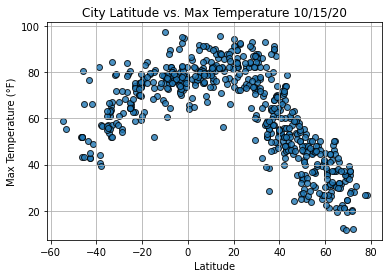

In [16]:
import matplotlib.pyplot as plt 
# Create the scatter plot for lat vs. max temp
plt.scatter(lats,
            max_temps,
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')
# Add the trimmings
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (°F)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('weather_data/Fig1.png')
plt.show()

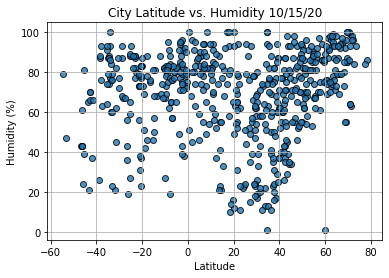

In [17]:
# Create the scatter plot for lat vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')
# Add the trimmings
plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('weather_data/Fig2.png')
plt.show()

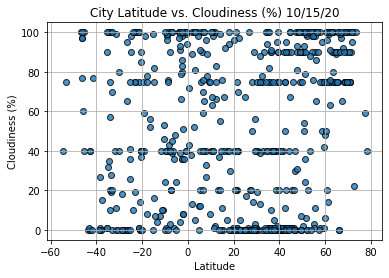

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

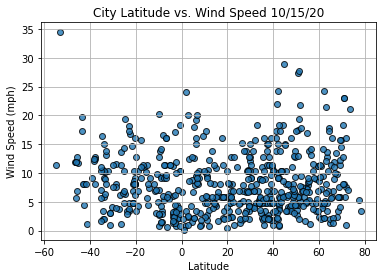

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()